# Training

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png']
6000
[[  0   0   0   0   0   0   0   0   0   0  90 156 177 182 196 176 117   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 239 253 239 214 226 214 231 245 248   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  36 241 203 219 192 190 193 207 200 232 135   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0  33 167 227 229 234 228 234 244 215 211 214 208 120   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0 157 227 207 207 229 229 232 207 241 227 235 224 203 221 176   0   0   2   0   0   0   0]
 [  0   0   0   0   0  65 218 189 192 187 196 189 188 202 181 195 222 219 190 180 217 125   0   0   0   0   0   0]
 [  0   0   0   0   0 158 213 196 196 191 188 186 179 192 177 192 126 155 193 189 200 166   0   0   0   0   0   0]
 [  0   0   0   0 

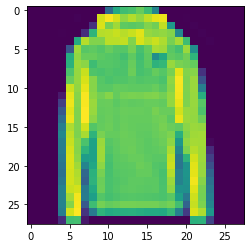

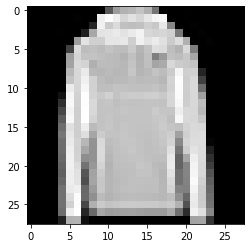

In [1]:
%run Data_Loading.ipynb

In [2]:
import os
import sys

module = os.path.abspath(os.path.join(".."))
if module not in sys.path:
    sys.path.append(module)

In [3]:
from Code_Sets.Accuracies import Accuracy_Categorical
from Code_Sets.Activation_Functions import Activation_ReLU, Activation_Softmax
from Code_Sets.Layers import Layer_Dense
from Code_Sets.Losses import CategoricalCrossentropy_Loss
from Code_Sets.Model_Object import Model
from Code_Sets.Optimizers import Optimizer_Adam

In [4]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [5]:
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5

In [6]:
model = Model()

In [7]:
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

In [8]:
model.set(
    loss=CategoricalCrossentropy_Loss(),
    optimizer=Optimizer_Adam(decay=1e-3),
    accuracy=Accuracy_Categorical(),
)

In [9]:
model.finalize()

In [10]:
model.train(
    X, y, validation_data=(X_test, y_test), epochs=10, batch_size=128, print_every=100
)

epoch: 1
step: 0, acc: 0.086, loss: 2.303 (data_loss: 2.303, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.758, loss: 0.581 (data_loss: 0.581, reg_loss: 0.000), lr: 0.0009090909090909091
step: 200, acc: 0.750, loss: 0.583 (data_loss: 0.583, reg_loss: 0.000), lr: 0.0008333333333333334
step: 300, acc: 0.828, loss: 0.497 (data_loss: 0.497, reg_loss: 0.000), lr: 0.0007692307692307692
step: 400, acc: 0.820, loss: 0.454 (data_loss: 0.454, reg_loss: 0.000), lr: 0.0007142857142857143
step: 468, acc: 0.812, loss: 0.412 (data_loss: 0.412, reg_loss: 0.000), lr: 0.000681198910081744
training, acc: 0.759, loss: 0.650 (data_loss: 0.650, reg_loss: 0.000), lr: 0.000681198910081744
validation, acc: 0.828, loss: 0.471
epoch: 2
step: 0, acc: 0.852, loss: 0.484 (data_loss: 0.484, reg_loss: 0.000), lr: 0.0006807351940095304
step: 100, acc: 0.844, loss: 0.413 (data_loss: 0.413, reg_loss: 0.000), lr: 0.0006373486297004461
step: 200, acc: 0.828, loss: 0.430 (data_loss: 0.430, reg_loss: 0.000), lr: 0.000599161

## Evaluation

In [11]:
model.evaluate(X_test, y_test)

validation, acc: 0.872, loss: 0.356


## Getting Parameters

In [12]:
parameters = model.get_parameters()
print(parameters)

[(array([[ 2.33032366e-02,  6.28711415e-03, -2.04672231e-02, ..., -3.76801659e-02, -1.77019952e-02,  1.18917964e-02],
       [ 3.54314252e-02,  6.32818040e-03, -1.51248829e-02, ..., -2.81497714e-02, -1.51610188e-02,  4.26608616e-03],
       [ 1.78997448e-02, -1.50203286e-03, -1.59792557e-02, ..., -1.62717890e-02, -3.55747132e-02, -2.67449856e-02],
       ...,
       [ 1.28962375e-02,  4.09278519e-04, -1.97413228e-02, ..., -2.62287796e-02,  7.07063137e-05,  7.72786500e-03],
       [ 1.97747044e-02,  1.83812611e-02, -3.46817632e-02, ..., -1.95109175e-02, -1.22683249e-02, -1.50102711e-02],
       [ 3.40762462e-02,  1.57782800e-02, -1.83214624e-02, ..., -8.42374902e-03,  9.33861066e-04, -1.87950956e-02]]), array([[-0.02036029, -0.0061649 ,  0.0182626 ,  0.00110122, -0.02971895,  0.01944598,  0.00373412, -0.02866656,  0.01381344,  0.03257947,  0.01297109,  0.01626314,  0.03546448, -0.01204464,
         0.0191888 , -0.01645802, -0.00712098, -0.00216704,  0.01546289, -0.02495594,  0.02384233,

## Save Parameters 

In [13]:
model.save_parameters("fashion_mnist.parms")

## Save Model

In [14]:
model.save("fashion_mnist.model")